In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
df = pd.read_csv("/content/gdrive/My Drive/DataFolder/mpg_car_dataset.csv", sep=' ')

In [ ]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.,chevrolet_chevelle_malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.,buick_skylark_320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.,plymouth_satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.,amc_rebel_sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.,ford_torino


In [ ]:
df.shape

(392, 9)

In [ ]:
df.dtypes

mpg             float64
cylinders       float64
displacement    float64
horsepower      float64
weight          float64
acceleration    float64
model_year      float64
origin           object
car_name         object
dtype: object

In [ ]:
df.isna().sum()

mpg               0
cylinders         0
displacement      0
horsepower        0
weight            0
acceleration      0
model_year        0
origin            0
car_name        338
dtype: int64

In [ ]:
df1 = df[['displacement','horsepower','weight']]
X = df1.values
y = df['mpg'].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
treeModel = DecisionTreeRegressor(max_depth = 3)
treeModel.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=7,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

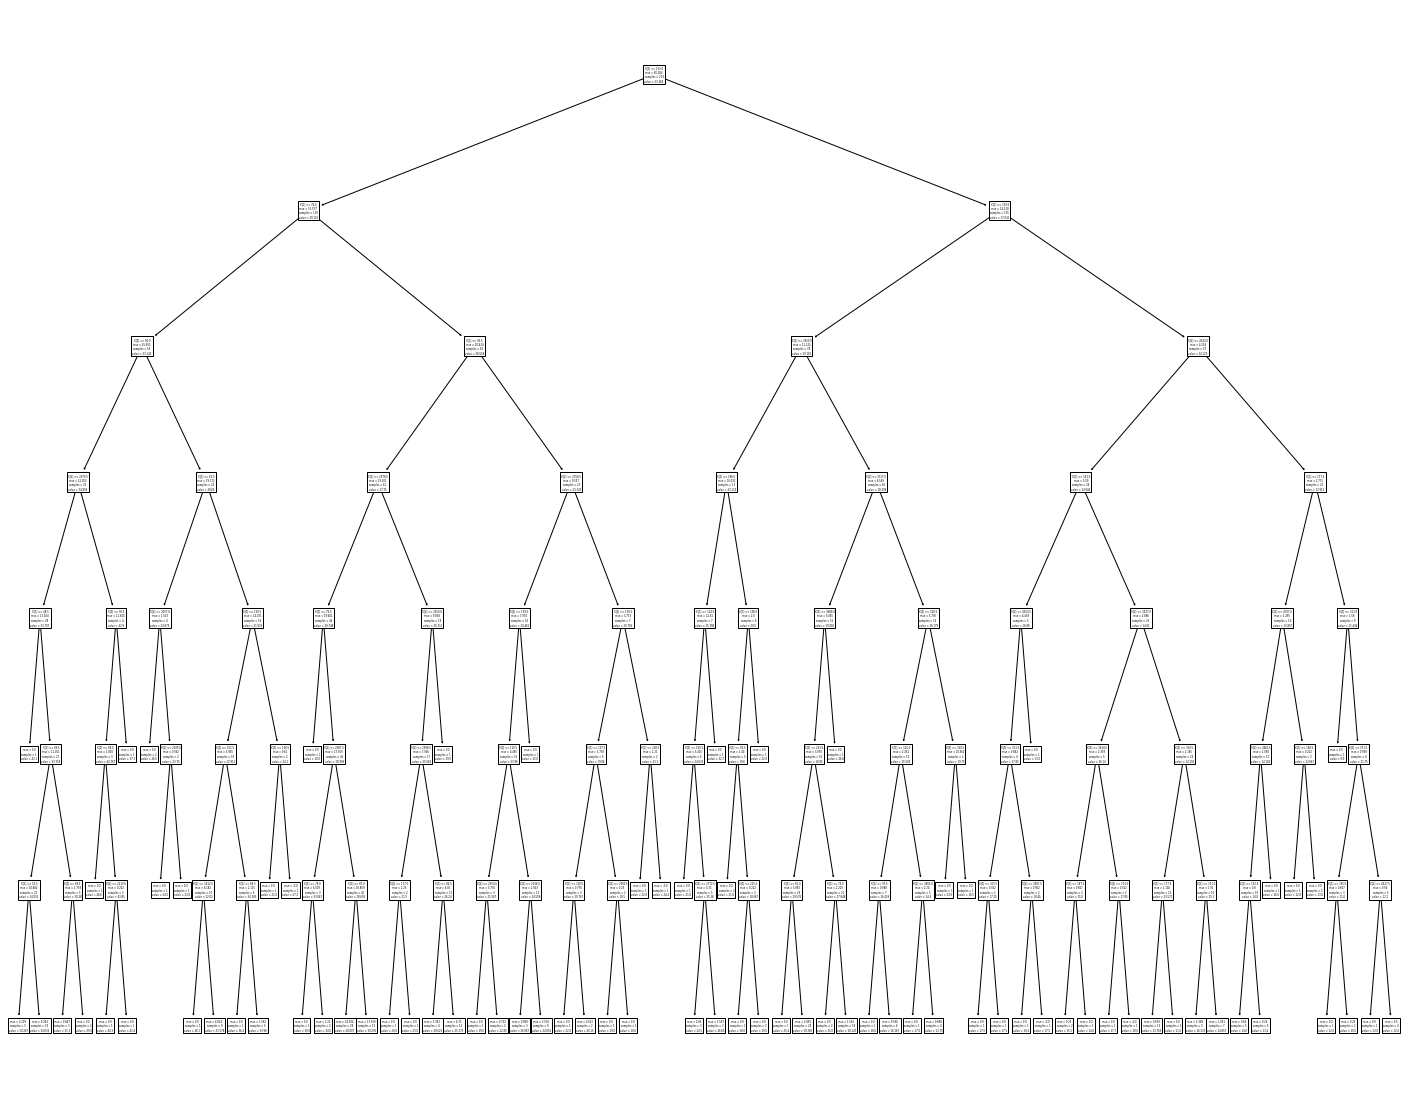

In [ ]:
from sklearn import tree
from matplotlib import pyplot as plt

plt.rc('figure',figsize=(25,20))
tree.plot_tree(treeModel)
plt.show()

In [ ]:
y_pred = treeModel.predict(X_test)

from sklearn.metrics import mean_absolute_error
print('MAE :',round(mean_absolute_error(y_test,y_pred),2))

MAE : 3.11


In [ ]:
importances = treeModel.feature_importances_
print(importances)

[0.70889983 0.21272017 0.07838   ]


In [ ]:
from sklearn.ensemble import RandomForestRegressor
randomForestModel=RandomForestRegressor(n_estimators=20, max_depth=3, n_jobs=-1,random_state=1)
randomForestModel.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=3, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=20, n_jobs=-1, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

In [ ]:
yforest_pred = randomForestModel.predict(X_test)

print('MAE :',round(mean_absolute_error(y_test,yforest_pred),2))

MAE : 2.92


In [ ]:
forestImportances = randomForestModel.feature_importances_
print(forestImportances)

[0.51074172 0.17662388 0.3126344 ]


In [ ]:
import pickle
pickle.dump(treeModel,open('/content/gdrive/My Drive/Models/mpg_car_model.pkl','wb'))

In [ ]:
from sklearn.neural_network import MLPRegressor

In [ ]:
mlpNeuralRegressor = MLPRegressor(hidden_layer_sizes=(25,6,),solver='lbfgs',random_state=1,max_iter=1000)
mlpNeuralRegressor.fit(X_train, y_train)
yNeural_pred = mlpNeuralRegressor.predict(X_test)
print('MAE :',round(mean_absolute_error(y_test,yNeural_pred),2))

MAE : 3.42
